<a href="https://colab.research.google.com/github/pollinations/hive/blob/main/interesting_notebooks/cut_scheduler_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cut_overview: [14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[14]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1+[13]*1

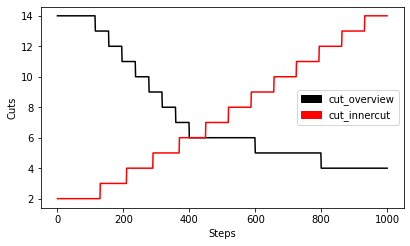

In [ ]:
### cut_scheduler.v2 2022.04.22 by Goti

import numpy as np
use_schedule_gen = True #@param{type: 'boolean'}
def cutnschedule(cut_overview_max, cut_innercut_max, cut_overview_min, cut_overview_delay, cut_innercut_delay, overview_end_bias, inner_start_bias):
    # Overview
    overview_truemid = int(cut_overview_max * 0.5)
    overview_end_bias = 1000 - overview_end_bias
    cut_overview = np.linspace(cut_overview_max, cut_overview_max, (cut_overview_delay), dtype='int').tolist()
    cut_overview += np.linspace(cut_overview_max+1, overview_truemid, (1000-cut_overview_delay-overview_end_bias)+1, dtype='int').tolist()
    del cut_overview[cut_overview_delay]
    cut_overview += np.linspace(cut_overview[-1], cut_overview_min, overview_end_bias+1, dtype='int').tolist()[1:]
    # Inner
    inner_truemid = int(cut_innercut_max * 0.5)  
    cut_innercut = np.linspace(cut_innercut_max+1, inner_truemid, 1000-cut_innercut_delay-inner_start_bias+1, dtype='int').tolist()
    del cut_innercut[0] 
    cut_innercut += np.linspace(cut_innercut[-1], cut_innercut_min, inner_start_bias+1, dtype='int').tolist()[1:]
    cut_innercut += np.linspace(cut_innercut_min, cut_innercut_min, (cut_innercut_delay), dtype='int').tolist()
    cut_innercut.reverse()
    return (cut_overview, cut_innercut)
 
cut_overview_max = 14 #@param{type: 'number'}
cut_overview_min = 4 #@param{type: 'number'}
cut_innercut_max = 14 #@param{type: 'number'}
cut_innercut_min = 2 #@param{type: 'number'}
cut_overview_delay = 75 #@param{type: 'number'}
cut_innercut_delay = 50 #@param{type: 'number'}
overview_end_bias = 400 #@param{type: 'number'}
inner_start_bias = 400 #@param{type: 'number'}

if use_schedule_gen == True:
    cut_overview, cut_innercut = cutnschedule(cut_overview_max=cut_overview_max, cut_innercut_max=cut_innercut_max, cut_overview_min=cut_overview_min, cut_overview_delay=cut_overview_delay, cut_innercut_delay=cut_innercut_delay, overview_end_bias = overview_end_bias, inner_start_bias = inner_start_bias)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
x = np.linspace(0, 1000, 1000, dtype='int')
fig, ax = plt.subplots(figsize=(6.5, 3.7))
overview_plot = ax.plot(x, cut_overview, color='black', label='cut_overview')
innercut_plot = ax.plot(x, cut_innercut, color='red', label='cut_innercut')
black_patch = mpatches.Patch(color='black', label='cut_overview')
red_patch = mpatches.Patch(color='red', label='cut_innercut')
ax.legend(handles=[black_patch,red_patch])
ax.set_xlabel('Steps') 
ax.set_ylabel('Cuts') 

cut_string = ""
inner_string = ""
for i in range(len(cut_overview)):
    if i < len(cut_overview)-1:
        cut_string += "["+str(cut_overview[i])+"]*1+"
        inner_string += "["+str(cut_innercut[i])+"]*1+"
    else:
        cut_string += "["+str(cut_overview[i])+"]*1"
        inner_string += "["+str(cut_innercut[i])+"]*1"
cut_overview = cut_string
cut_innercut = inner_string 
print(f'cut_overview: {cut_string}')
print(f'cut_innercut: {inner_string}')
plt.show()
